In [1]:
# Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Read the dataset

company=pd.read_csv("Company_Data.csv")

In [3]:
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [4]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [5]:
company.tail()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes
399,9.71,134,37,0,27,120,Good,49,16,Yes,Yes


In [6]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [7]:
company.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [8]:
company.size

4400

In [9]:
company.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [10]:
company.duplicated().sum()

0

In [11]:
company.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

<Axes: >

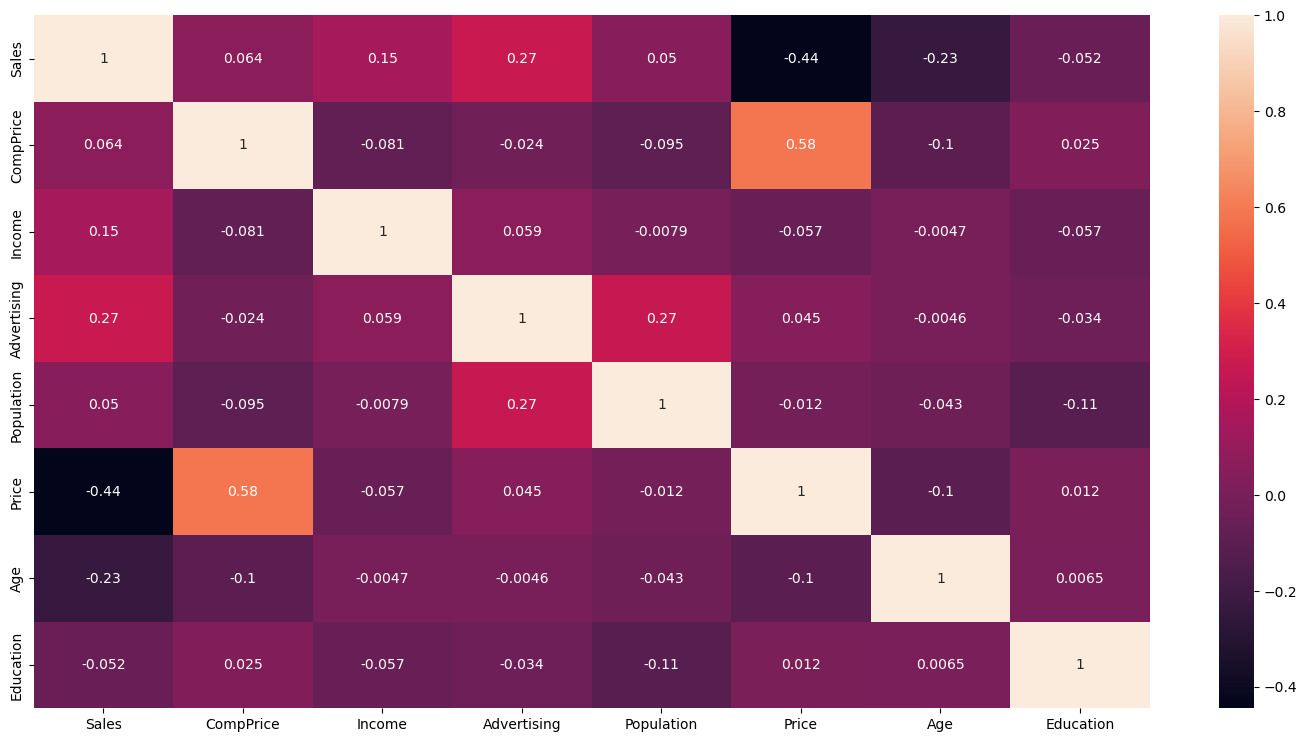

In [12]:
# Heatmap

plt.figure(figsize=(18,9))
sns.heatmap(company.corr(),annot=True)

In [13]:
features= (['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'])


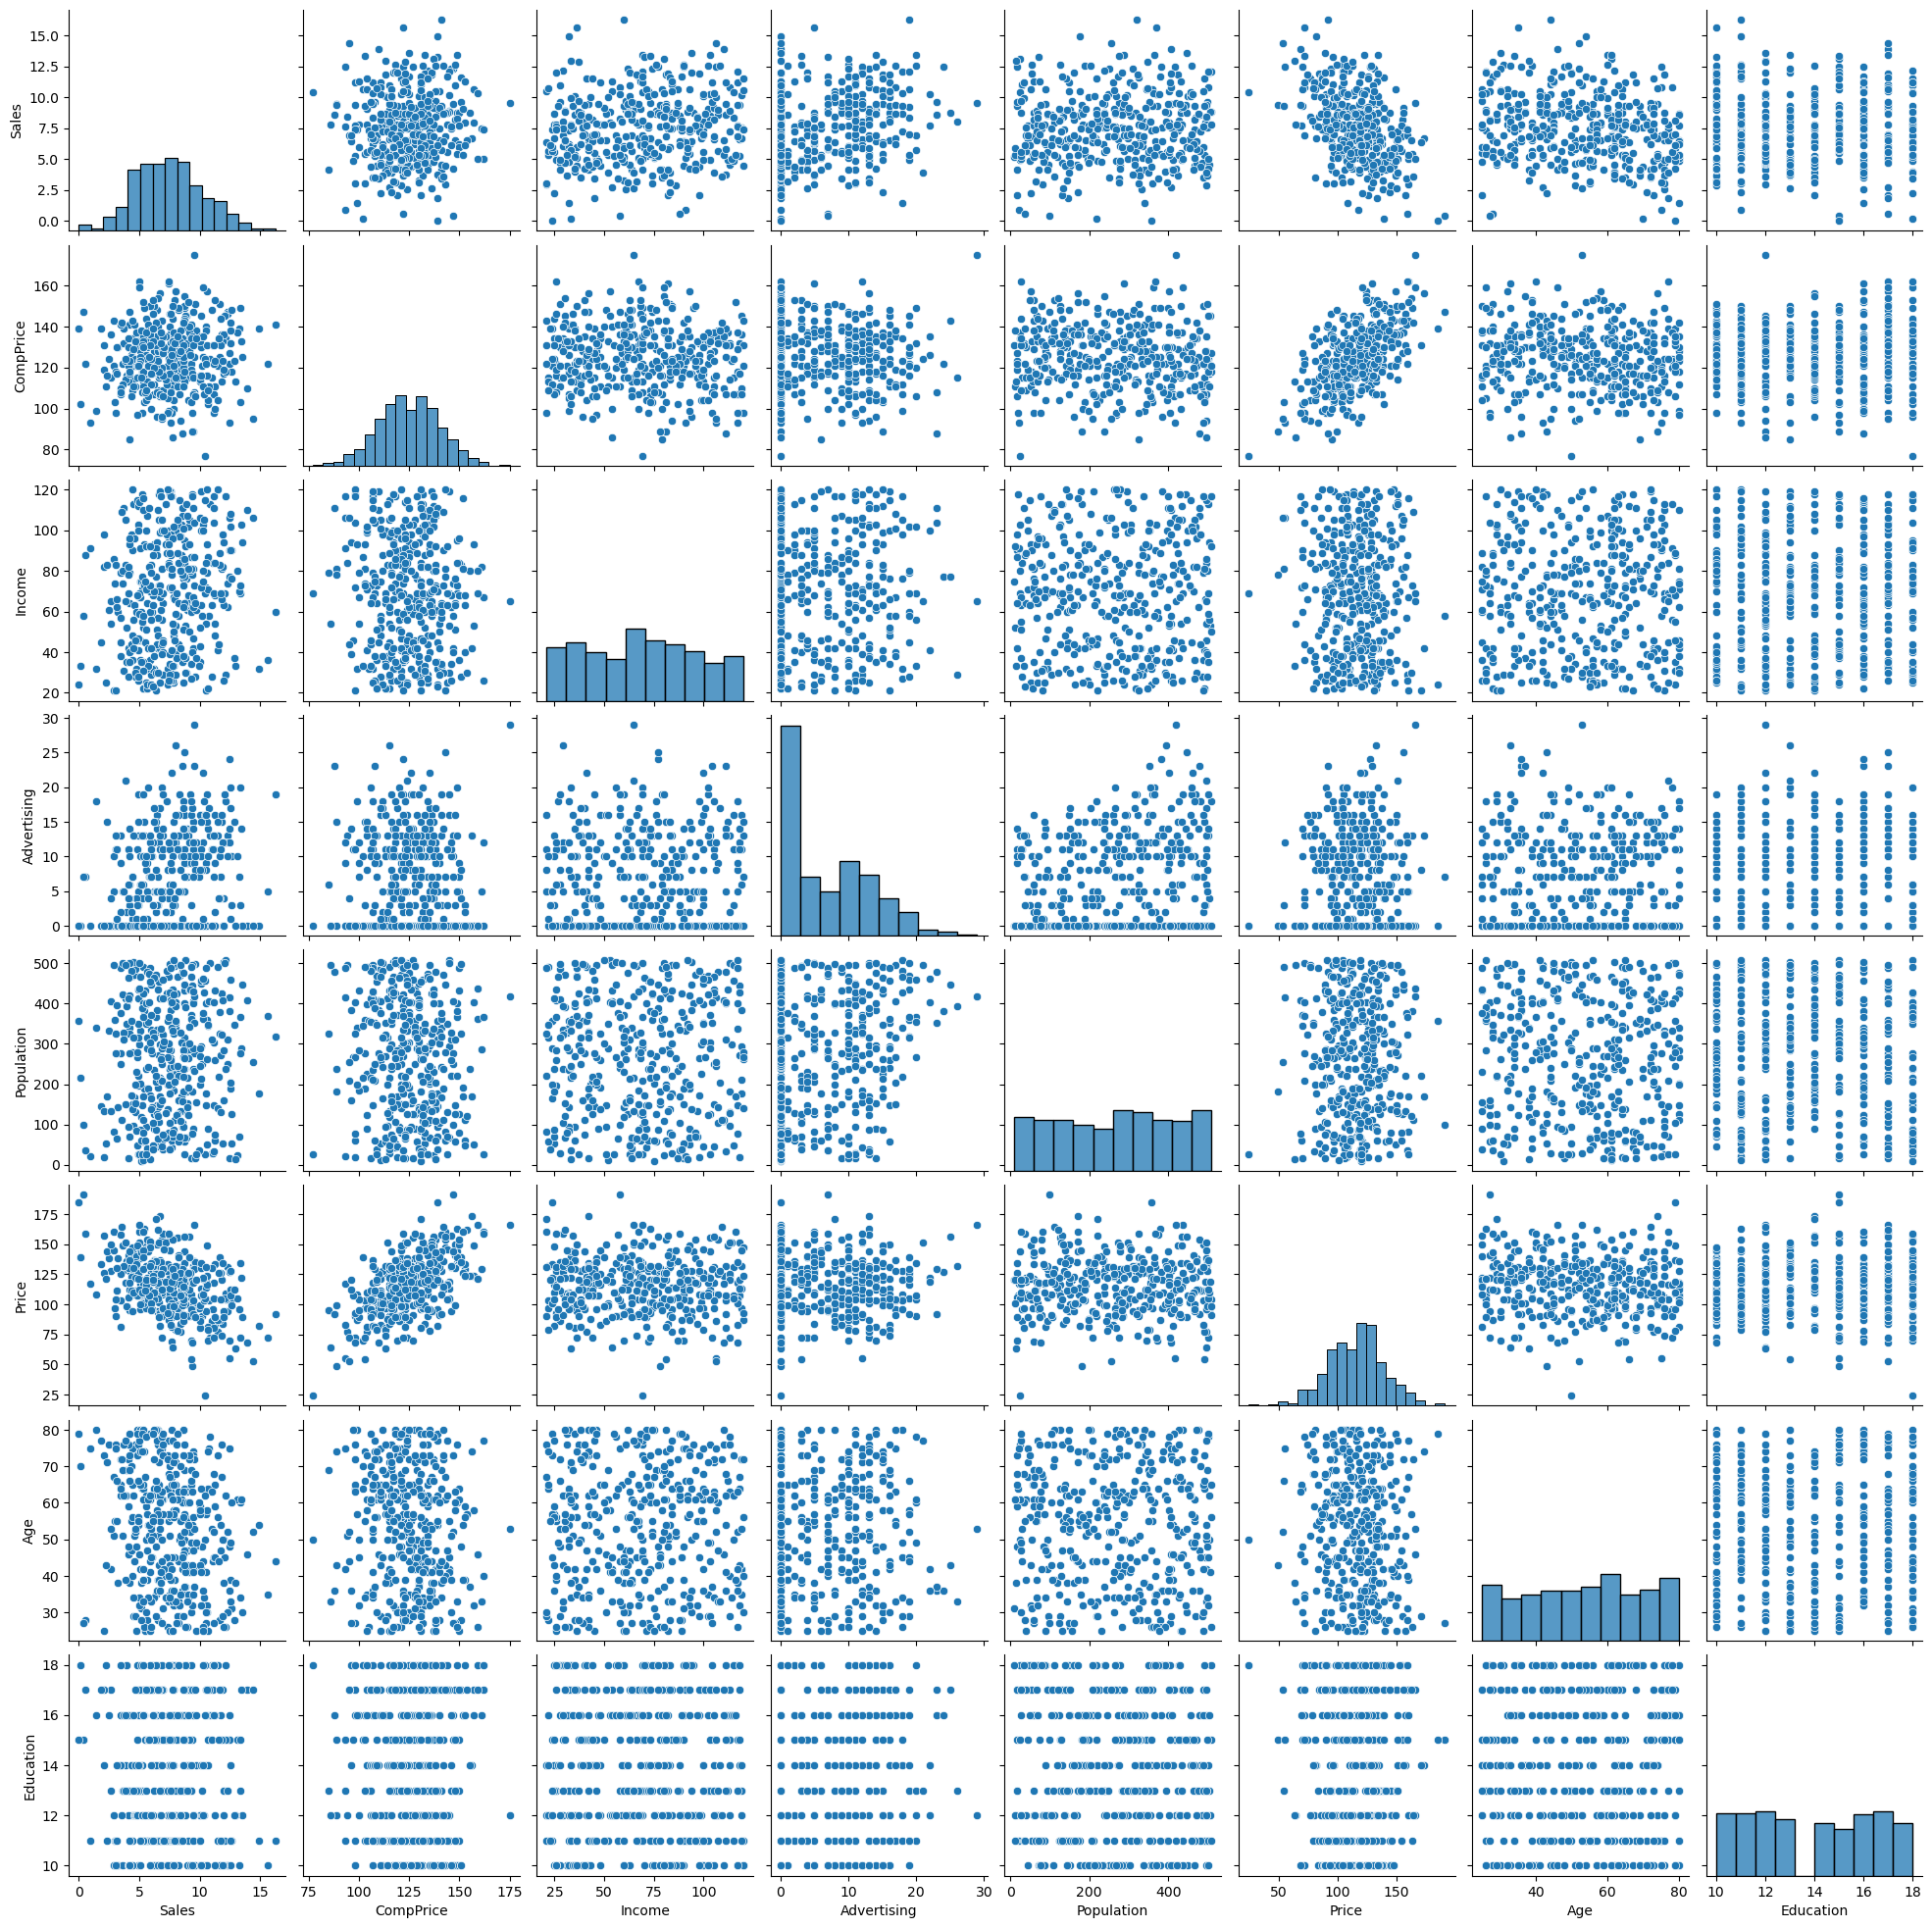

In [14]:
sns.pairplot(company[features])


In [15]:
company_1=company.copy()
company_1["Status"]=company_1["Sales"].apply(lambda Sales: "Low" if Sales<=7.5 else "High")
company_1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Status
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,High
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Low
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Low


In [16]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

for i in company_1.columns:
    print(i)
    if company_1[i].dtypes==object:
        company_1[i]=encoder.fit_transform(company_1[i])
    else:
        pass

Sales
CompPrice
Income
Advertising
Population
Price
ShelveLoc
Age
Education
Urban
US
Status


In [17]:
# Dropping the Sales column

company_1.drop(["Sales"],axis=1,inplace=True)
company_1

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Status
0,138,73,11,276,120,0,42,17,1,1,0
1,111,48,16,260,83,1,65,10,1,1,0
2,113,35,10,269,80,2,59,12,1,1,0
3,117,100,4,466,97,2,55,14,1,1,1
4,141,64,3,340,128,0,38,13,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1,0
396,139,23,3,37,120,2,55,11,0,1,1
397,162,26,12,368,159,2,40,18,1,1,1
398,100,79,7,284,95,0,50,12,1,1,1


In [18]:
# Splitting the data into independent and dependent variable

x=company_1.iloc[:,0:10]
y=company_1.iloc[:,10]

In [19]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [20]:
y

0      0
1      0
2      0
3      1
4      1
      ..
395    0
396    1
397    1
398    1
399    0
Name: Status, Length: 400, dtype: int32

In [21]:
# Train test data

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=60)
model=DecisionTreeClassifier(criterion="entropy",max_depth=3,random_state=60)
model.fit(xtrain,ytrain)


DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=60)

In [22]:
# Predicting the model

pred=model.predict(xtest)
np.mean(pred==ytest)

0.625

#  Model Building

# Building Decision Tree Classifier using Entropy Criteria

[Text(0.5, 0.875, 'x[4] <= 127.5\nentropy = 1.0\nsamples = 280\nvalue = [139, 141]'),
 Text(0.25, 0.625, 'x[4] <= 89.5\nentropy = 0.958\nsamples = 195\nvalue = [121, 74]'),
 Text(0.125, 0.375, 'x[2] <= 4.5\nentropy = 0.461\nsamples = 41\nvalue = [37, 4]'),
 Text(0.0625, 0.125, 'entropy = 0.742\nsamples = 19\nvalue = [15, 4]'),
 Text(0.1875, 0.125, 'entropy = 0.0\nsamples = 22\nvalue = [22, 0]'),
 Text(0.375, 0.375, 'x[5] <= 0.5\nentropy = 0.994\nsamples = 154\nvalue = [84, 70]'),
 Text(0.3125, 0.125, 'entropy = 0.65\nsamples = 30\nvalue = [5, 25]'),
 Text(0.4375, 0.125, 'entropy = 0.945\nsamples = 124\nvalue = [79, 45]'),
 Text(0.75, 0.625, 'x[0] <= 146.5\nentropy = 0.745\nsamples = 85\nvalue = [18, 67]'),
 Text(0.625, 0.375, 'x[4] <= 136.5\nentropy = 0.576\nsamples = 73\nvalue = [10, 63]'),
 Text(0.5625, 0.125, 'entropy = 0.831\nsamples = 38\nvalue = [10, 28]'),
 Text(0.6875, 0.125, 'entropy = 0.0\nsamples = 35\nvalue = [0, 35]'),
 Text(0.875, 0.375, 'x[1] <= 39.0\nentropy = 0.918\nsa

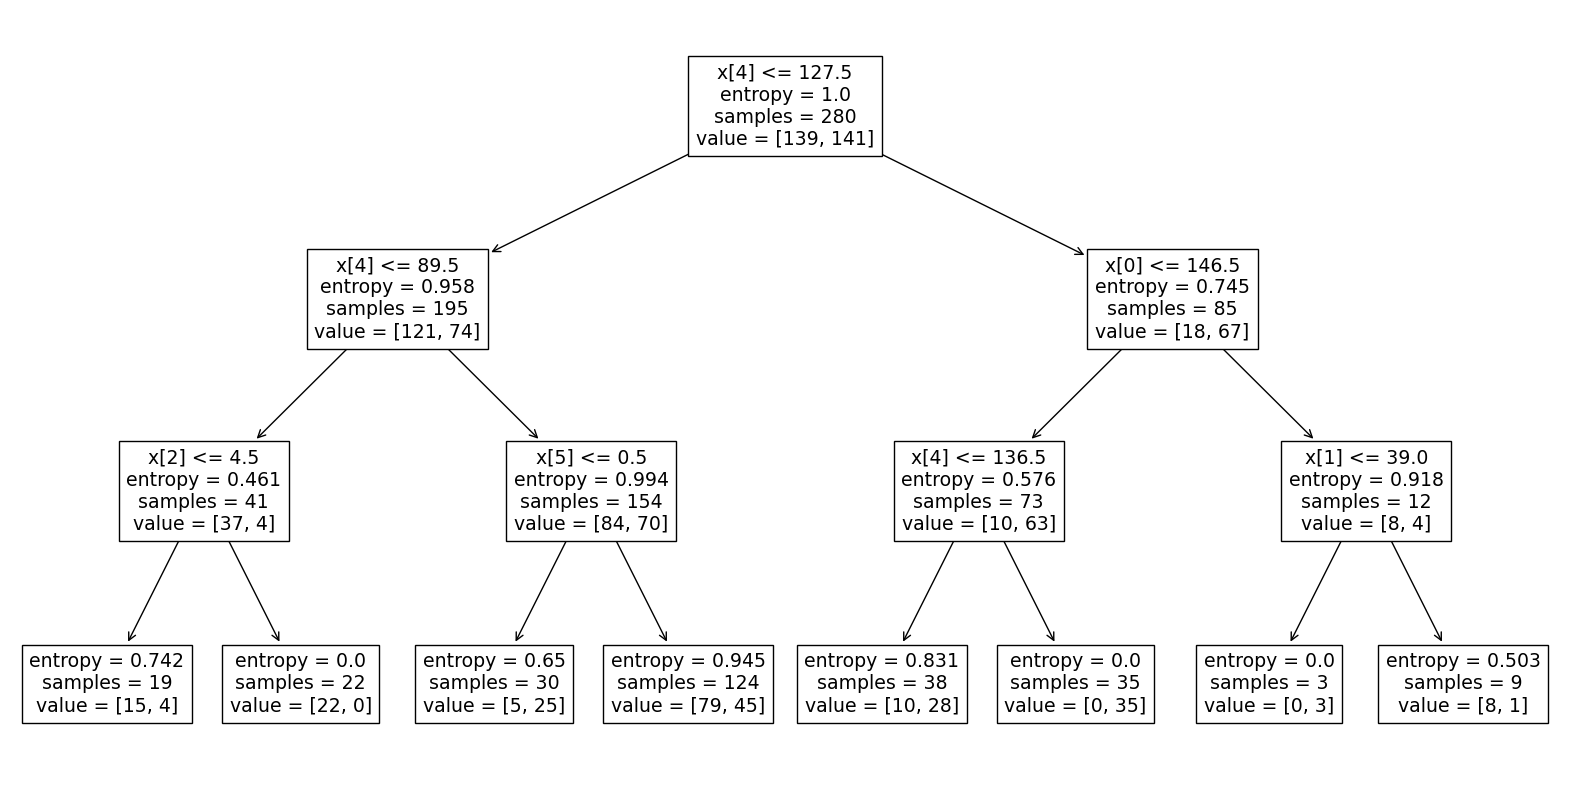

In [23]:
# Plotting the Decision tree

plt.figure(figsize=(20,10))
tree.plot_tree(model)

[Text(0.5, 0.875, 'Price <= 127.5\nentropy = 1.0\nsamples = 280\nvalue = [139, 141]\nclass = High'),
 Text(0.25, 0.625, 'Price <= 89.5\nentropy = 0.958\nsamples = 195\nvalue = [121, 74]\nclass = Low'),
 Text(0.125, 0.375, 'Advertising <= 4.5\nentropy = 0.461\nsamples = 41\nvalue = [37, 4]\nclass = Low'),
 Text(0.0625, 0.125, 'entropy = 0.742\nsamples = 19\nvalue = [15, 4]\nclass = Low'),
 Text(0.1875, 0.125, 'entropy = 0.0\nsamples = 22\nvalue = [22, 0]\nclass = Low'),
 Text(0.375, 0.375, 'ShelveLoc <= 0.5\nentropy = 0.994\nsamples = 154\nvalue = [84, 70]\nclass = Low'),
 Text(0.3125, 0.125, 'entropy = 0.65\nsamples = 30\nvalue = [5, 25]\nclass = High'),
 Text(0.4375, 0.125, 'entropy = 0.945\nsamples = 124\nvalue = [79, 45]\nclass = Low'),
 Text(0.75, 0.625, 'CompPrice <= 146.5\nentropy = 0.745\nsamples = 85\nvalue = [18, 67]\nclass = High'),
 Text(0.625, 0.375, 'Price <= 136.5\nentropy = 0.576\nsamples = 73\nvalue = [10, 63]\nclass = High'),
 Text(0.5625, 0.125, 'entropy = 0.831\nsamp

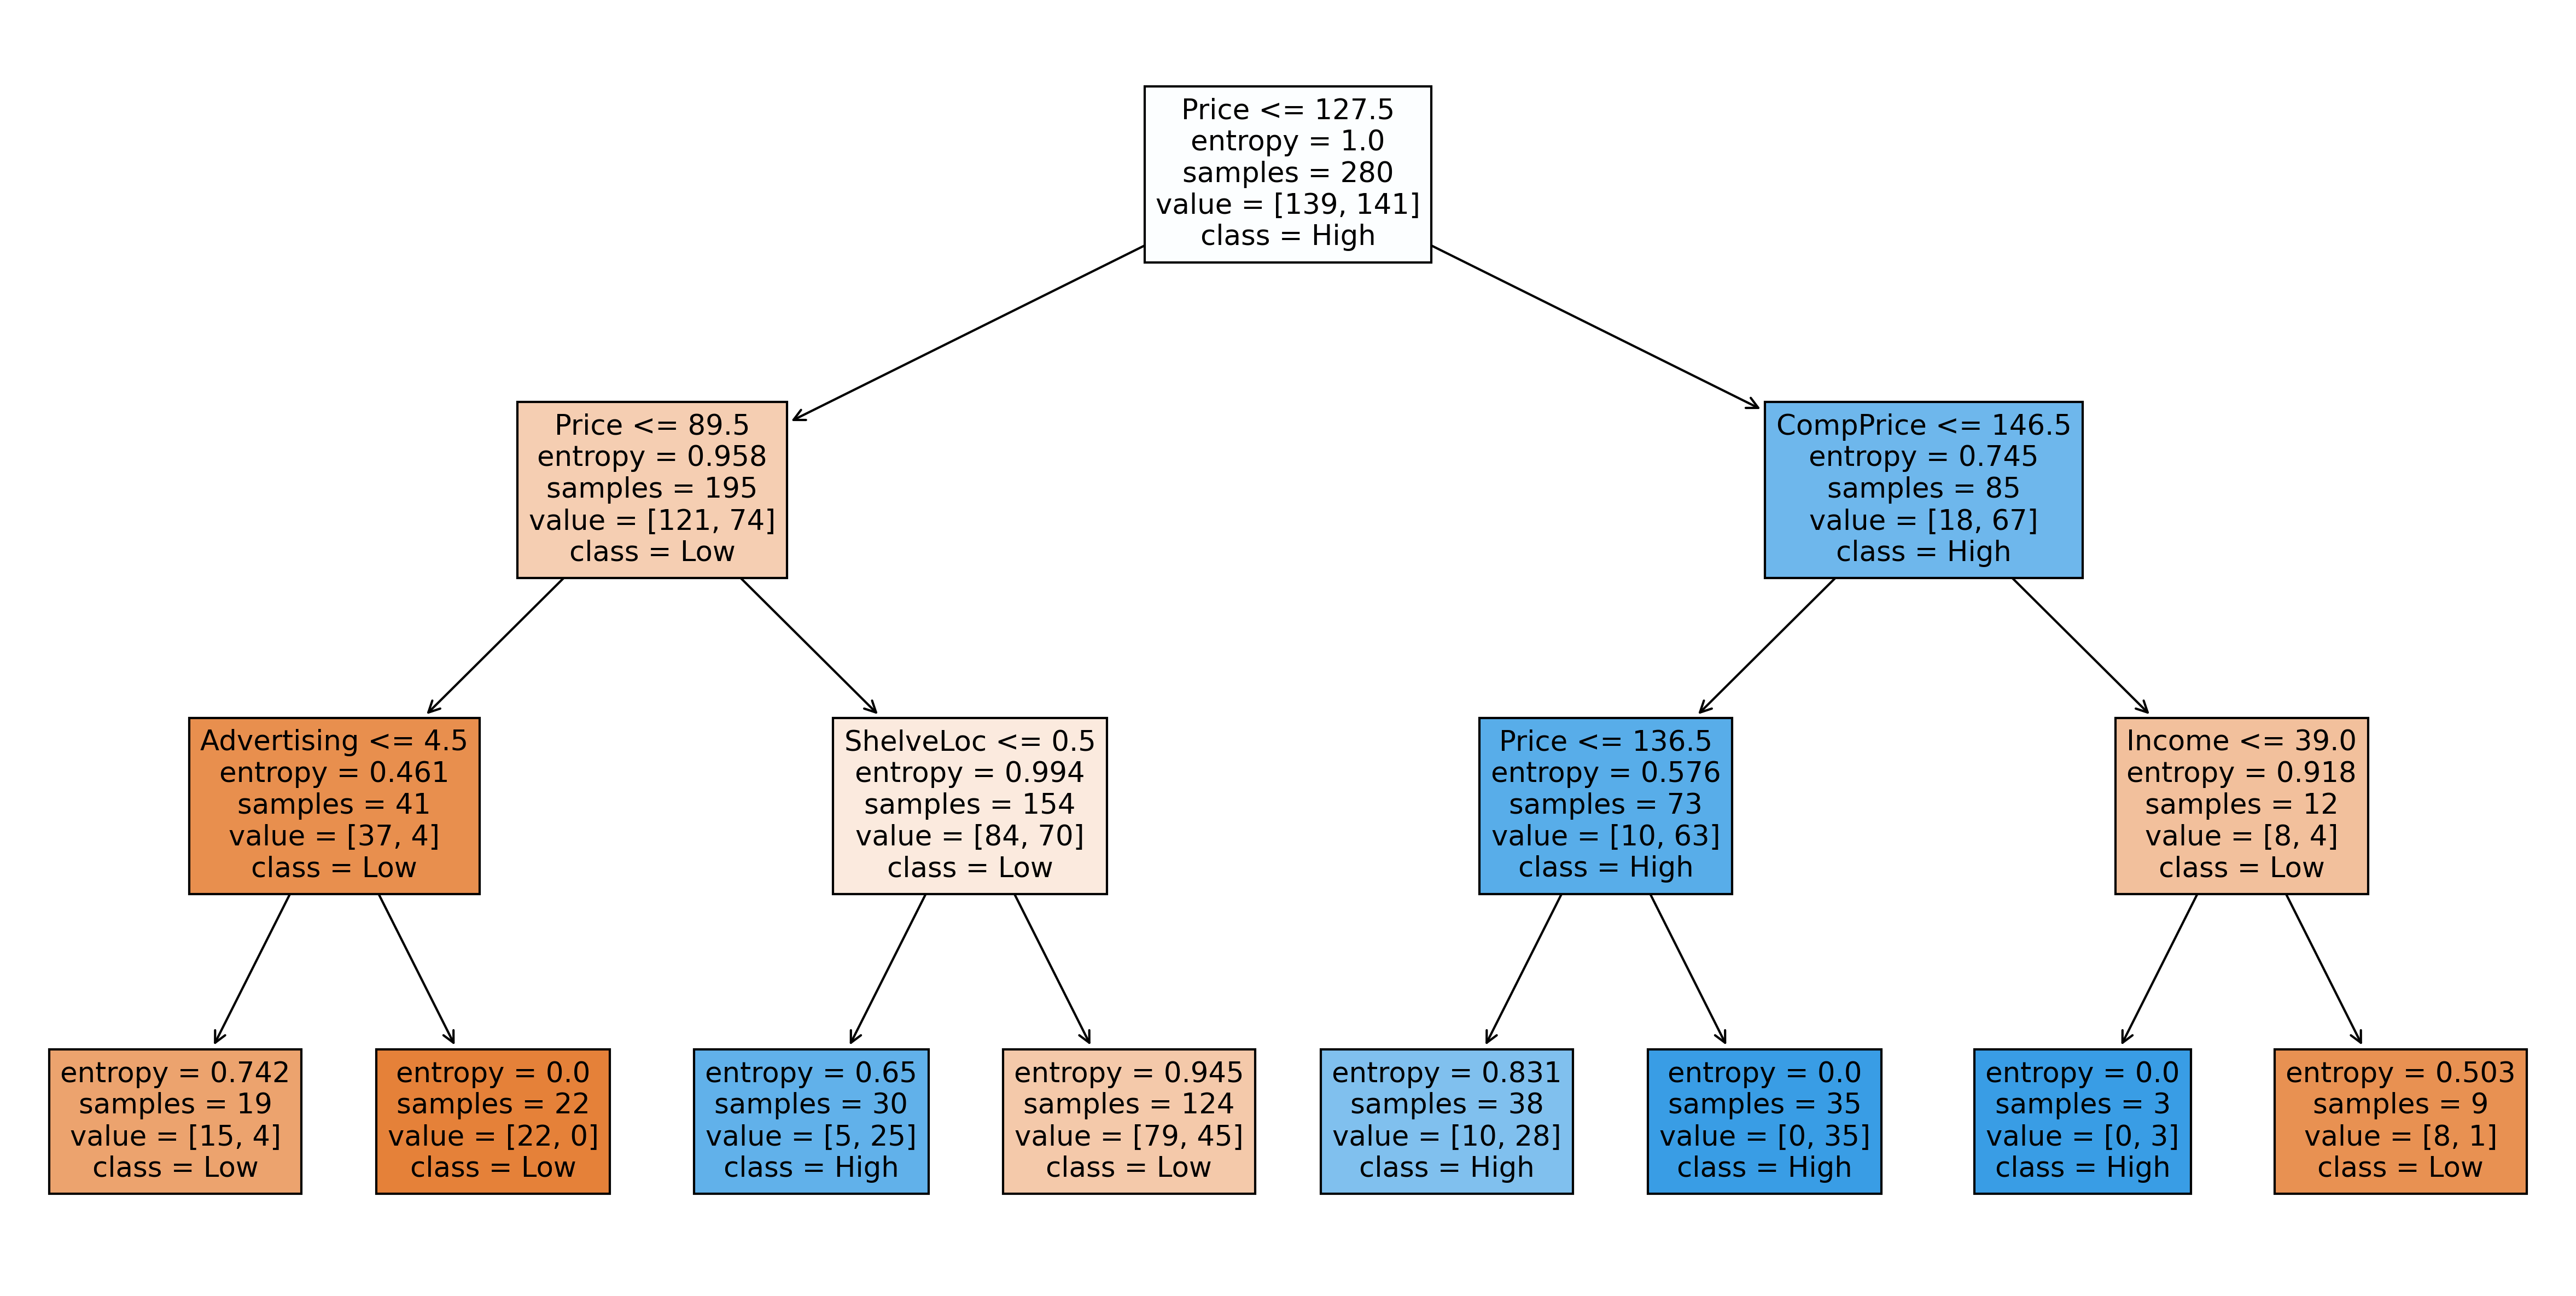

In [24]:
fn=company_1.columns
cn=["Low","High"]

fig, axes = plt.subplots(nrows=1, ncols=1, figsize = (20,10), dpi=300)
tree.plot_tree(model, feature_names=fn, class_names=cn, filled=True)

In [25]:
text=tree.export_text(model,max_depth=3)
print(text)

|--- feature_4 <= 127.50
|   |--- feature_4 <= 89.50
|   |   |--- feature_2 <= 4.50
|   |   |   |--- class: 0
|   |   |--- feature_2 >  4.50
|   |   |   |--- class: 0
|   |--- feature_4 >  89.50
|   |   |--- feature_5 <= 0.50
|   |   |   |--- class: 1
|   |   |--- feature_5 >  0.50
|   |   |   |--- class: 0
|--- feature_4 >  127.50
|   |--- feature_0 <= 146.50
|   |   |--- feature_4 <= 136.50
|   |   |   |--- class: 1
|   |   |--- feature_4 >  136.50
|   |   |   |--- class: 1
|   |--- feature_0 >  146.50
|   |   |--- feature_1 <= 39.00
|   |   |   |--- class: 1
|   |   |--- feature_1 >  39.00
|   |   |   |--- class: 0



In [26]:
model.feature_importances_

array([0.10984186, 0.06973628, 0.05160299, 0.        , 0.592693  ,
       0.17612587, 0.        , 0.        , 0.        , 0.        ])

#  Model Validation and Testing

In [27]:
# Predicting on the test Data

#Prediting on the test data
preds=model.predict(xtest)

#Getting the count of each category
pd.Series(preds).value_counts()


0    66
1    54
dtype: int64

In [28]:
preds

array([1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0])

In [29]:
# Understanding the right answer and wrong prediction

pd.crosstab(ytest,preds)

col_0,0,1
Status,,
0,40,19
1,26,35


In [30]:
# Calculating the accuracy

np.mean(preds==ytest)

0.625

#  Building Decision Tree Classifier (CART) using Gini Criteria


In [31]:
from sklearn.tree import DecisionTreeClassifier

model_gini=DecisionTreeClassifier(criterion="gini",max_depth=3)


In [32]:
model_gini

DecisionTreeClassifier(max_depth=3)

In [33]:
#prediction and computing the accuracy

pred=model.predict(xtest)
np.mean(preds==ytest)

0.625

#  Bagging Model

In [34]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [35]:
seed = 7

kfold = KFold(n_splits=10)
cart = DecisionTreeClassifier()
num_trees = 100

In [36]:
Bagging_model=BaggingClassifier(base_estimator=cart,n_estimators=num_trees,random_state=seed)
Bagging_model.fit(xtrain,ytrain)
results=cross_val_score(Bagging_model,xtrain,ytrain,cv=kfold)

In [37]:
print(results.mean())

0.7928571428571428


In [38]:
Bagging_preds=Bagging_model.predict(xtest)

In [39]:
pd.crosstab(ytest,Bagging_preds)

col_0,0,1
Status,,
0,41,18
1,10,51


In [40]:
# Calculating the Accuracy

np.mean(Bagging_preds==ytest)

0.7666666666666667

#  Random Forest Model

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
num_trees=100
max_features=3
kfold=KFold(n_splits=10)
Random_forest_model=RandomForestClassifier(n_estimators=num_trees,max_features=max_features)
Random_forest_model.fit(xtrain,ytrain)


RandomForestClassifier(max_features=3)

In [43]:
Random_forest_results=cross_val_score(Random_forest_model,xtrain,ytrain,cv=kfold)


In [44]:
Random_forest_results

array([0.82142857, 0.75      , 0.82142857, 0.64285714, 0.78571429,
       0.85714286, 0.89285714, 0.89285714, 0.75      , 0.89285714])

In [45]:
print(Random_forest_results.mean())

0.8107142857142857


In [46]:
Random_forest_preds=Random_forest_model.predict(xtest)
pd.crosstab(ytest,Random_forest_preds)

col_0,0,1
Status,,
0,40,19
1,9,52


In [47]:
# Calculating the Accuracy

np.mean(Random_forest_preds==ytest)

0.7666666666666667

#  AdaBOOST  Model

In [48]:
from sklearn.ensemble import AdaBoostClassifier

In [49]:
num_seeds=10
seeds=7
kfold=KFold(n_splits=10)
AdaBoost_model=AdaBoostClassifier(n_estimators=num_trees,random_state=seed)
AdaBoost_model.fit(xtrain,ytrain)

AdaBoostClassifier(n_estimators=100, random_state=7)

In [50]:
AdaBoost_results=cross_val_score(AdaBoost_model,xtrain,ytrain,cv=kfold)
AdaBoost_results

array([0.85714286, 0.78571429, 0.85714286, 0.78571429, 0.89285714,
       0.82142857, 0.85714286, 0.82142857, 0.89285714, 0.85714286])

In [51]:
print(AdaBoost_results.mean()*100)

84.28571428571429


In [52]:
AdaBoost_preds=AdaBoost_model.predict(xtest)
pd.crosstab(ytest,AdaBoost_preds)

col_0,0,1
Status,,
0,45,14
1,11,50


In [53]:
# Calculating the accuracy

np.mean(AdaBoost_preds==ytest)


0.7916666666666666